In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#open the csv file at src/data/results/benchmark_results.csv
df = pd.read_csv('/Users/charlesc/Documents/GitHub/FSPSimulator/src/data/results/benchmark_results.csv')

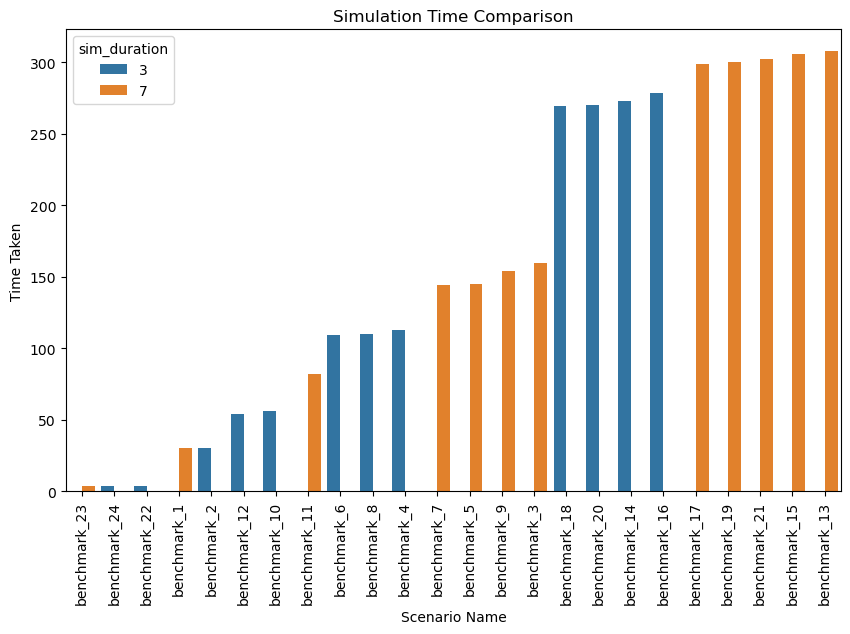

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file
data = pd.read_csv('/Users/charlesc/Documents/GitHub/FSPSimulator/src/data/results/benchmark_results.csv')

# Sort the data by time_taken in ascending order
data_sorted = data.sort_values(by='time_taken')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='scenario_name', y='time_taken', hue='sim_duration', data=data_sorted)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Labels and title
plt.xlabel('Scenario Name')
plt.ylabel('Time Taken')
plt.title('Simulation Time Comparison')

# Show the plot
plt.show()


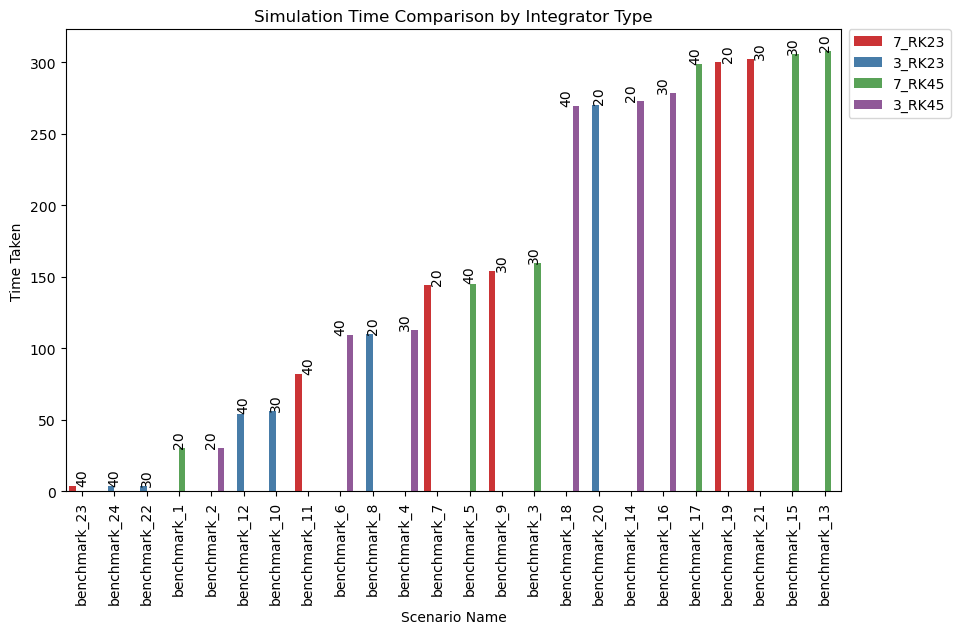

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file
data = pd.read_csv('/Users/charlesc/Documents/GitHub/FSPSimulator/src/data/results/benchmark_results.csv')

# Combine 'sim_duration' and 'integrator_type' into a new column
data['sim_duration_integrator'] = data['sim_duration'].astype(str) + "_" + data['integrator_type'].astype(str)

# Sort the data by time_taken in ascending order
data_sorted = data.sort_values(by='time_taken')

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='scenario_name', y='time_taken', hue='sim_duration_integrator', data=data_sorted, palette='Set1')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Labels and title
plt.xlabel('Scenario Name')
plt.ylabel('Time Taken')
plt.title('Simulation Time Comparison by Integrator Type')

# If 'step_size' is a number, you might need to convert it to string before concatenating
data_sorted['step_size'] = data_sorted['step_size'].astype(str)

# Add labels for step size, rotated by 90 degrees
for i, (idx, row) in enumerate(data_sorted.iterrows()):
    bar_plot.text(i, row['time_taken'], row['step_size'], ha='center', va='bottom', rotation=90)

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

# Show the plot
plt.show()


In [6]:
df.columns
# Index(['scenario_name', 'step_s§ize', 'output_frequency', 'integrator_type',
#        'sim_duration', 'time_taken'],
#       dtype='object')

Index(['scenario_name', 'step_size', 'output_frequency', 'integrator_type',
       'sim_duration', 'time_taken'],
      dtype='object')

In [ ]:
#plot all the variales against one another


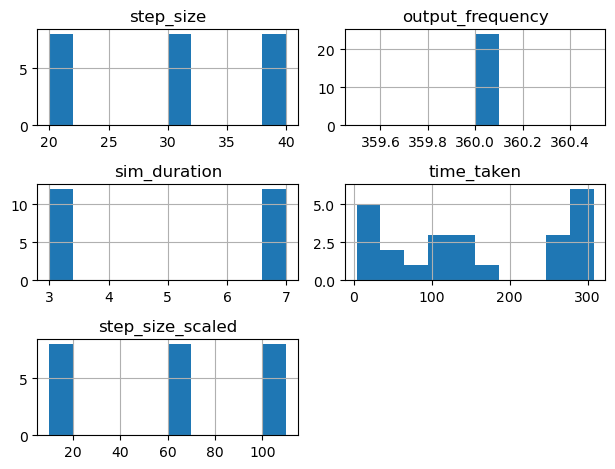

In [19]:
#plot a hisogram of all the columns
df.hist()
plt.tight_layout()

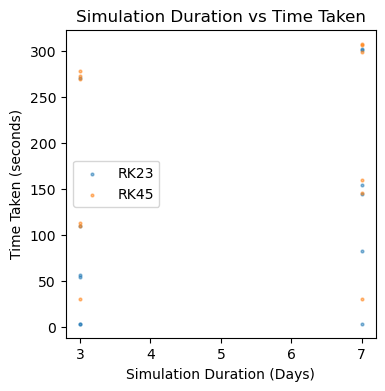

In [14]:
#same as above but colour the points by integrator_type (RK45, RK23, etc.)
colorbar_categories = df['integrator_type'].unique()
colorbar_categories.sort()

plt.figure(figsize=(4,4))
for category in colorbar_categories:
    plt.scatter(df[df['integrator_type'] == category]['sim_duration'], df[df['integrator_type'] == category]['time_taken'], label=category, s=4, alpha=0.5)
plt.xlabel('Simulation Duration (Days)')
plt.ylabel('Time Taken (seconds)')
plt.title('Simulation Duration vs Time Taken')
plt.legend()
plt.show()




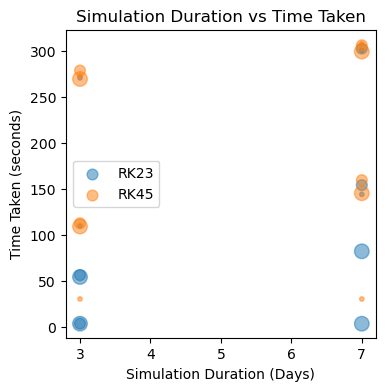

In [15]:
plt.figure(figsize=(4,4))

# Normalize step_size to suitable size for plotting
# Adjust the multiplication factor and addition as needed to get a good range of sizes
df['step_size_scaled'] = (df['step_size'] - df['step_size'].min()) / (df['step_size'].max() - df['step_size'].min()) * 100 + 10

for category in colorbar_categories:
    plt.scatter(df[df['integrator_type'] == category]['sim_duration'], 
                df[df['integrator_type'] == category]['time_taken'], 
                label=category, 
                s=df[df['integrator_type'] == category]['step_size_scaled'], 
                alpha=0.5)
plt.xlabel('Simulation Duration (Days)')
plt.ylabel('Time Taken (seconds)')
plt.title('Simulation Duration vs Time Taken')
plt.legend()
plt.show()


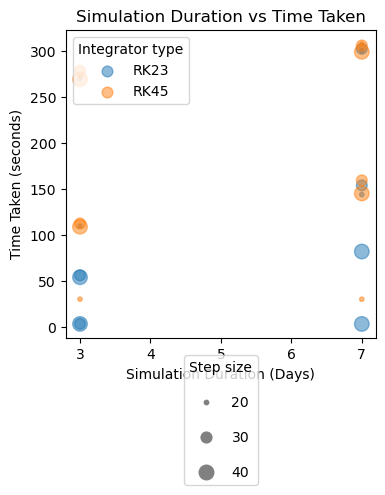

In [17]:
import matplotlib.patches as mpatches
import numpy as np

plt.figure(figsize=(4,4))

# Assuming that your step sizes are integers
step_sizes = df['step_size'].unique()
step_sizes.sort()

# Normalize step_size to suitable size for plotting
df['step_size_scaled'] = (df['step_size'] - df['step_size'].min()) / (df['step_size'].max() - df['step_size'].min()) * 100 + 10

for category in colorbar_categories:
    plt.scatter(df[df['integrator_type'] == category]['sim_duration'], 
                df[df['integrator_type'] == category]['time_taken'], 
                label=category, 
                s=df[df['integrator_type'] == category]['step_size_scaled'], 
                alpha=0.5)
plt.xlabel('Simulation Duration (Days)')
plt.ylabel('Time Taken (seconds)')
plt.title('Simulation Duration vs Time Taken')

# Handle for integrator type legend
legend1 = plt.legend(title='Integrator type', loc='upper left')

# Add the legend manually to the current Axes.
plt.gca().add_artist(legend1)

# Create a legend for step sizes
markers = [plt.Line2D([0,0],[0,0], color='gray', marker='o', linestyle='', markersize=np.sqrt((step_size - df['step_size'].min()) / (df['step_size'].max() - df['step_size'].min()) * 100 + 10)) for step_size in step_sizes]
plt.legend(markers, step_sizes, title='Step size', labelspacing=1.5, loc='lower center', bbox_to_anchor=(0.5, -0.5))

plt.show()


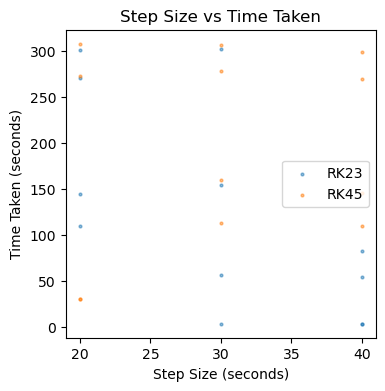

In [21]:
#time_taken vs step_size
plt.figure(figsize=(4,4))
for category in colorbar_categories:
    plt.scatter(df[df['integrator_type'] == category]['step_size'], df[df['integrator_type'] == category]['time_taken'], label=category, s=4, alpha=0.5)
plt.xlabel('Step Size (seconds)')
plt.ylabel('Time Taken (seconds)')
plt.title('Step Size vs Time Taken')
plt.legend()
